Posterior mean HIV prevalence: 0.1138%
95% credible interval: [0.0017%, 0.3490%]
Probability prevalence > 2%: 0.00%


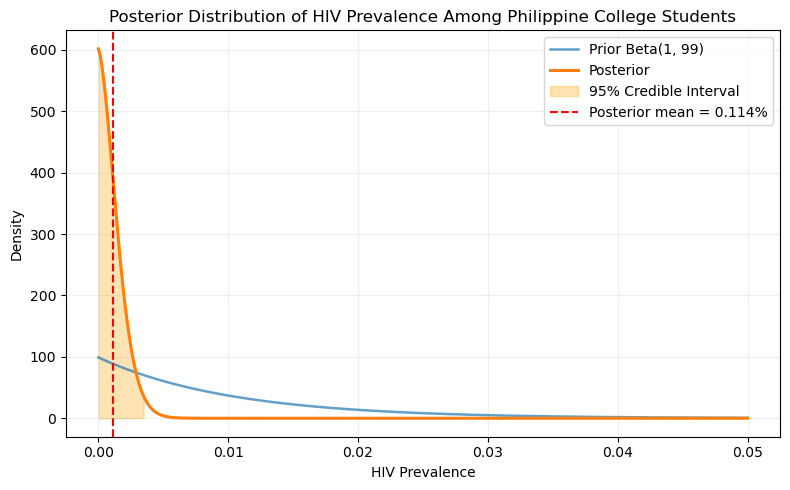

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

# --- 1. Parameters ---
n = 3000           # students tested
k = 15             # positive test results

sensitivity = 0.99
specificity = 0.995

prior_alpha = 1    # Beta(1,99) prior (mean 0.01)
prior_beta = 99

# --- 2. Grid for prevalence p from 0% to 5% ---
p_grid = np.linspace(0, 0.05, 2000)

# Probability test positive given prevalence p:
q_p = sensitivity * p_grid + (1 - specificity) * (1 - p_grid)

# Likelihood of k positives:
likelihood = binom.pmf(k, n, q_p)

# Prior pdf:
prior_pdf = beta.pdf(p_grid, prior_alpha, prior_beta)

# Unnormalized posterior
post_unnorm = likelihood * prior_pdf

# Normalize posterior
posterior_pdf = post_unnorm / np.trapz(post_unnorm, p_grid)

# --- 3. Sample from posterior ---
cdf = np.cumsum(posterior_pdf)
cdf /= cdf[-1]

N_SAMPLES = 200_000
random_vals = np.random.rand(N_SAMPLES)
posterior_samples = np.interp(random_vals, cdf, p_grid)

# Compute posterior mean and 95% credible interval
post_mean = posterior_samples.mean()
ci_lower, ci_upper = np.percentile(posterior_samples, [2.5, 97.5])

# --- 4. Print summaries ---
print(f"Posterior mean HIV prevalence: {post_mean:.4%}")
print(f"95% credible interval: [{ci_lower:.4%}, {ci_upper:.4%}]")
print(f"Probability prevalence > 2%: {(posterior_samples > 0.02).mean():.2%}")

# --- 5. Plot prior and posterior ---
plt.figure(figsize=(8,5))

plt.plot(p_grid, prior_pdf, label='Prior Beta(1, 99)', lw=1.8, alpha=0.7)
plt.plot(p_grid, posterior_pdf, label='Posterior', lw=2.2)

plt.fill_between(p_grid, 0, posterior_pdf,
                 where=(p_grid >= ci_lower) & (p_grid <= ci_upper),
                 color='orange', alpha=0.3, label='95% Credible Interval')

plt.axvline(post_mean, color='red', linestyle='--',
            label=f'Posterior mean = {post_mean:.3%}')

plt.title('Posterior Distribution of HIV Prevalence Among Philippine College Students')
plt.xlabel('HIV Prevalence')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()